In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import nd2
from glob import glob
import sys
sys.path.append('ipa/src/')
import correction_utils as cor
import stackview
import time

In [3]:
df_comb = []
for path in glob('runs/20240529_beads/detections_matched/detections_matched_*.csv'):
    df_temp = pd.read_csv(path)
    df_temp['file'] = path
    df_temp['image'] = path.split('_')[11]
    df_temp['smoothing'] = path.split('_')[-1].strip('.csv')
    df_temp['crop_size'] = path.split('_')[-3]
    df_comb.append(df_temp)

df = pd.concat(df_comb)

In [4]:
df

,x,y,z,x_fitted,y_fitted,z_fitted,frame,method,z_fitted_refined,x_fitted_refined,...,x_um,y_um,z_um,dx,dy,dz,file,image,smoothing,crop_size
0,920.0,402.0,7.0,920.530257,401.896374,6.972885,0,com,6.993889,920.710699,...,119.692391,52.245648,2.098167,0.118867,-0.024860,0.016346,runs/20240529_beads/detections_matched/detecti...,005,1,13
1,433.0,786.0,6.0,433.193603,785.965224,6.115891,0,com,6.099110,433.265467,...,56.324511,102.161150,1.829733,0.022821,0.046901,-0.000974,runs/20240529_beads/detections_matched/detecti...,005,1,13
2,761.0,635.0,6.0,761.414635,635.005636,6.275985,0,com,6.240505,761.325405,...,98.972303,82.537723,1.872151,0.064064,0.012569,-0.022476,runs/20240529_beads/detections_matched/detecti...,005,1,13
3,951.0,564.0,7.0,951.646116,563.732670,6.563458,0,com,6.607234,951.721447,...,123.723788,73.282944,1.982170,0.123341,-0.021049,0.027832,runs/20240529_beads/detections_matched/detecti...,005,1,13
4,315.0,391.0,7.0,315.190601,391.020801,6.860349,0,com,6.886320,315.247964,...,40.982235,50.837436,2.065896,0.002955,0.002527,-0.015437,runs/20240529_beads/detections_matched/detecti...,005,1,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,792.0,609.0,7.0,792.345954,609.103098,6.945431,0,com,6.933964,792.360105,...,103.006814,79.184013,2.080189,-0.002055,-0.004795,0.013666,runs/20240529_beads/detections_matched/detecti...,010,0,11
22,441.0,543.0,7.0,441.192103,542.989391,7.011838,0,com,6.992357,441.179603,...,57.353348,70.588518,2.097707,-0.000667,0.004769,0.004048,runs/20240529_beads/detections_matched/detecti...,010,0,11
23,782.0,821.0,6.0,782.000172,820.953595,6.028796,0,com,6.040871,781.992769,...,101.659060,106.720383,1.812261,0.012078,0.003189,0.004976,runs/20240529_beads/detections_matched/detecti...,010,0,11
24,831.0,323.0,7.0,831.021133,323.021056,7.040343,0,com,7.053674,831.044543,...,108.035791,41.993264,2.116102,0.002742,-0.002915,0.004068,runs/20240529_beads/detections_matched/detecti...,010,0,11


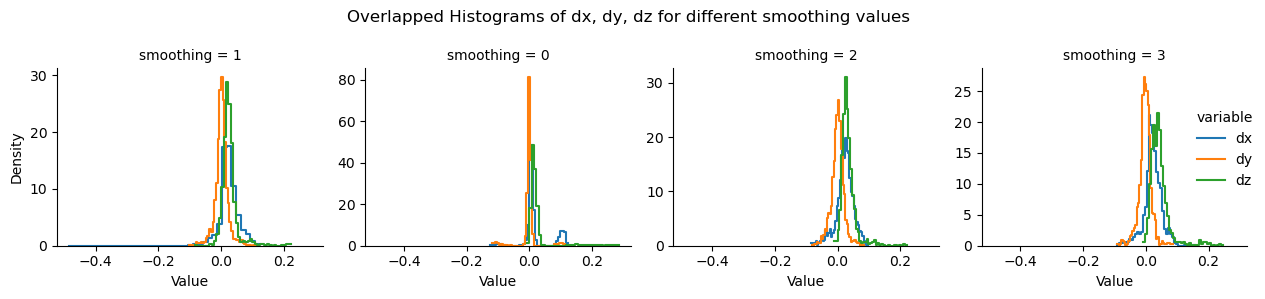

In [5]:
# Reshape the DataFrame to long format
df_long = df.melt(id_vars='smoothing', value_vars=['dx', 'dy', 'dz'], var_name='variable', value_name='value')

b = 40
# Create a FacetGrid
g = sns.FacetGrid(df_long, col='smoothing', hue='variable', sharex=True, sharey=False, margin_titles=True)
g.map(sns.histplot, 'value', bins=b,fill=False,stat='density',element='step')

# Add a legend
g.add_legend()

# Add titles and labels
g.set_axis_labels("Value", "Density")
# g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Overlapped Histograms of dx, dy, dz for different smoothing values')
plt.tight_layout()
plt.show()

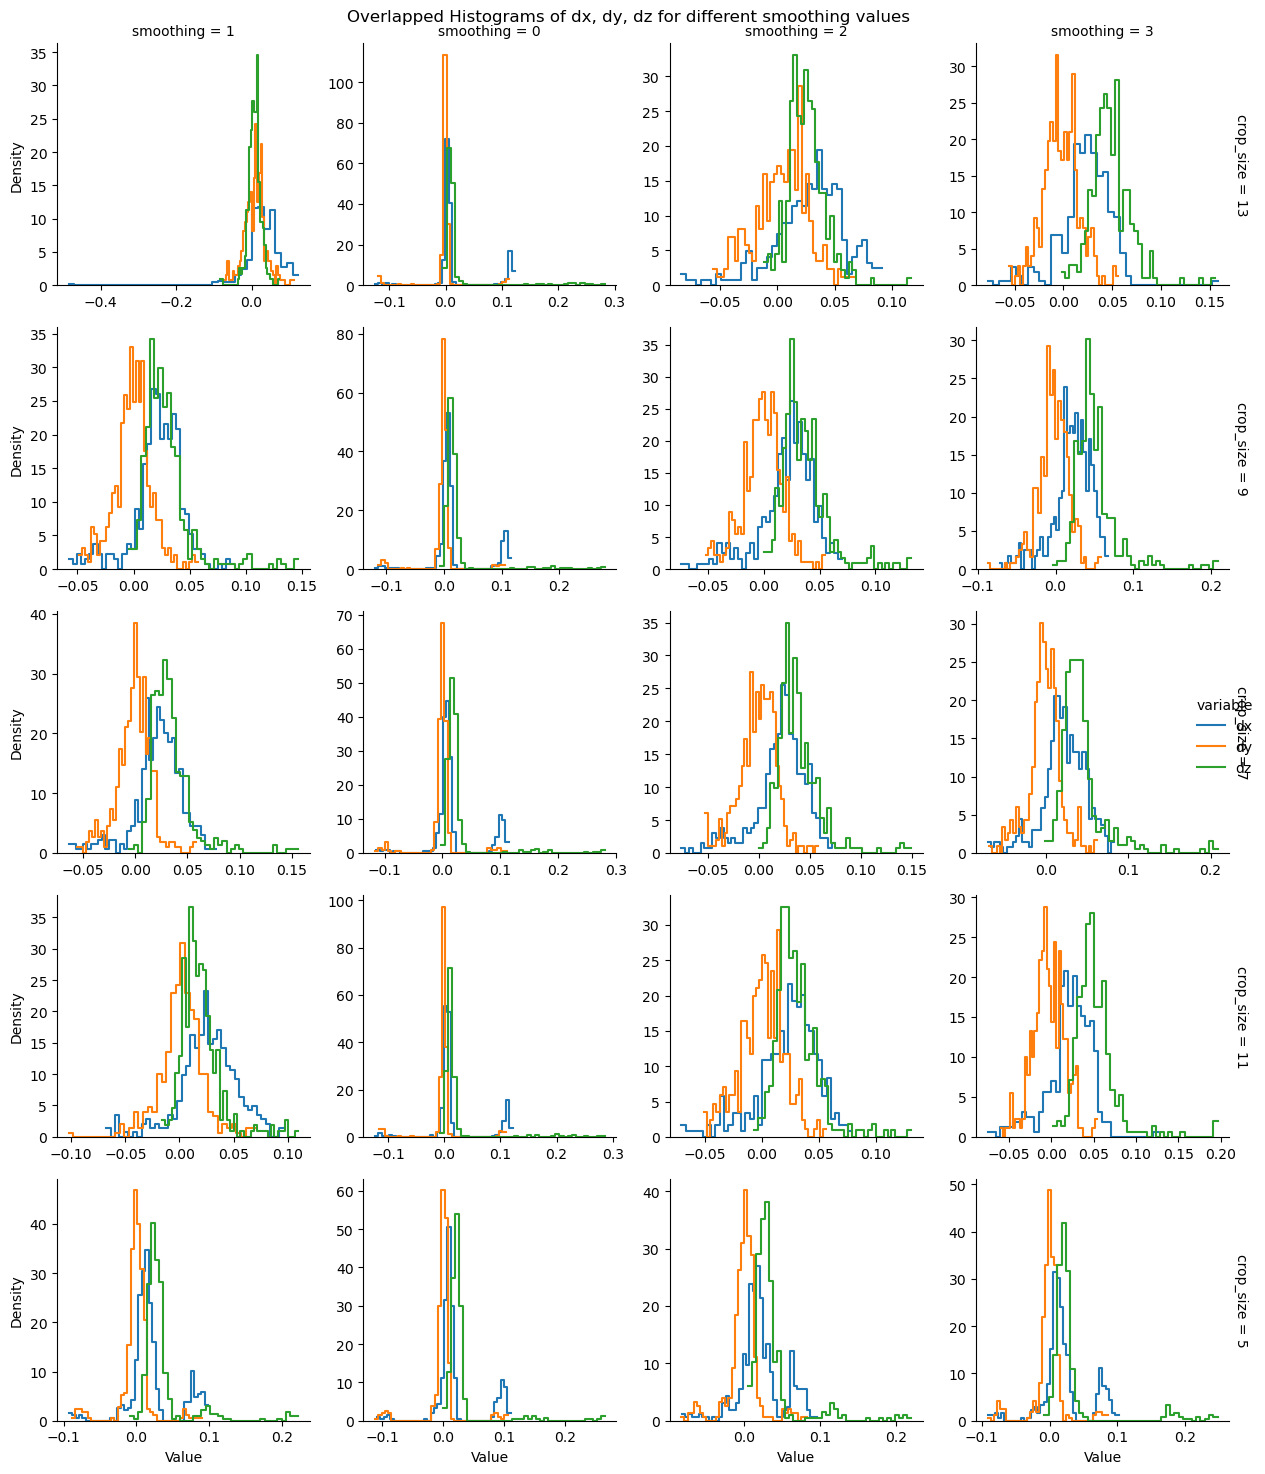

In [6]:
# Reshape the DataFrame to long format
df_long = df.melt(id_vars=['smoothing','crop_size'], value_vars=['dx', 'dy', 'dz'], var_name='variable', value_name='value')

b = 40
# Create a FacetGrid
g = sns.FacetGrid(df_long, col='smoothing',row='crop_size', hue='variable', sharex=False, sharey=False, margin_titles=True)
g.map(sns.histplot, 'value', bins=b,fill=False,stat='density',element='step')

# Add a legend
g.add_legend()

# Add titles and labels
g.set_axis_labels("Value", "Density")
# g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Overlapped Histograms of dx, dy, dz for different smoothing values')
plt.tight_layout()
plt.show()

In [7]:
np.mean(np.abs(df.dx))

0.0294345881200547

In [8]:
np.mean(np.abs(df.dy))

0.013422628011849213

In [9]:
np.mean(np.abs(df.dz))

0.032472259728686545

Text(0, 0.5, 'dz (um)')

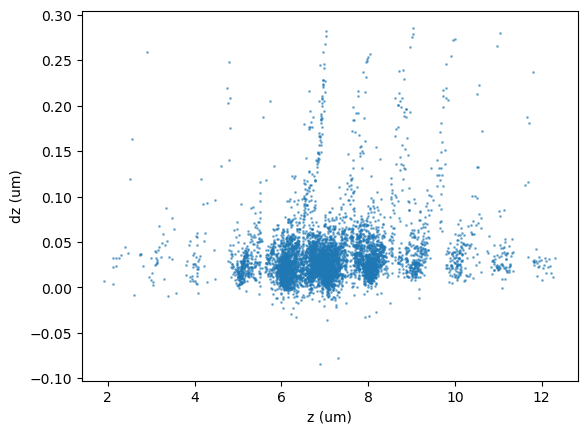

In [10]:

plt.plot(df['z_fitted'], df['dz'], 'o', markersize=1,alpha=0.5)
plt.xlabel('z (um)')
plt.ylabel('dz (um)')

(-0.2, 0.2)

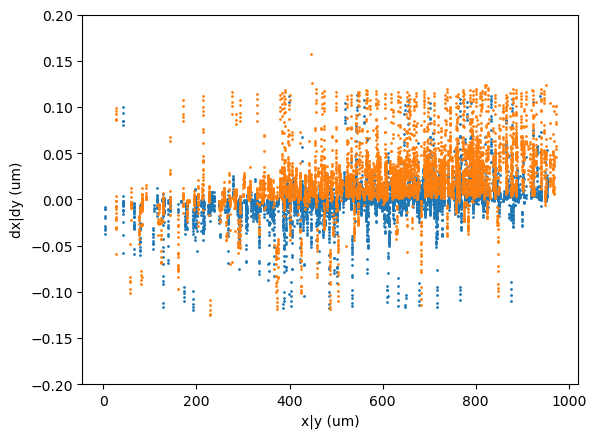

In [11]:

plt.plot(df['y_fitted'], df['dy'], 'o', markersize=1)
plt.plot(df['x_fitted'], df['dx'], 'o', markersize=1)
plt.xlabel('x|y (um)')
plt.ylabel('dx|dy (um)')
plt.ylim(-0.2,0.2)

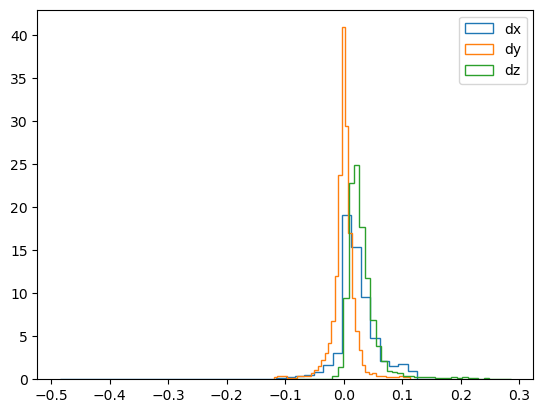

In [12]:
b = 40
plt.hist(df['dx'], bins=b,histtype='step',label='dx',density=True)
plt.hist(df['dy'], bins=b,histtype='step',label='dy',density=True)
plt.hist(df['dz'], bins=b,histtype='step',label='dz',density=True)
plt.legend()
plt.show()

In [13]:
d = np.mean(np.sqrt(df['dx']**2 + df['dy']**2+df['dz']**2))
d

0.052929727772166646

## rototranslation

In [22]:
df_filtered = df

In [23]:
reference = df_filtered[['x','y','z']].values.T
moving = df_filtered[['x','y','z']].values.T + df_filtered[['dx','dy','dz']].values.T

In [24]:
R, t = cor.calculate_rototranslation_3D(reference.T,moving.T)

In [25]:
moving_cor = np.dot(R,moving)+t

In [26]:
dx,dy,dz = reference - moving_cor

In [32]:
print(np.mean(np.sqrt(dx**2)),np.mean(np.sqrt(df_filtered['dx']**2)))

0.024806197552010873 0.038380736869813546


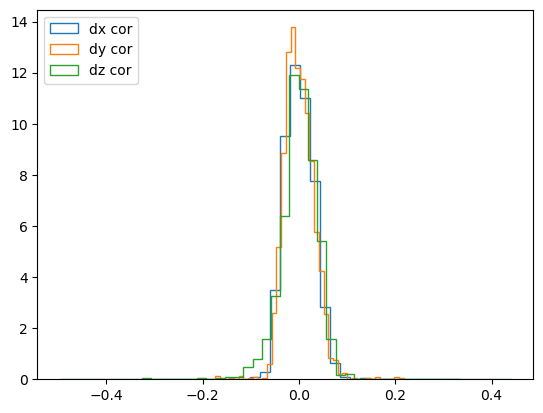

In [37]:
b = 40
# plt.hist(df_filtered['dx'], bins=b,histtype='step',label='dx',density=True)
plt.hist(dx, bins=b,histtype='step',label='dx cor',density=True)
# plt.hist(df_filtered['dy'], bins=b,histtype='step',label='dy',density=True)
plt.hist(dy, bins=b,histtype='step',label='dy cor',density=True)
# plt.hist(df_filtered['dz'], bins=b,histtype='step',label='dz',density=True)
plt.hist(dz, bins=b,histtype='step',label='dz cor',density=True)
plt.legend()
plt.show()

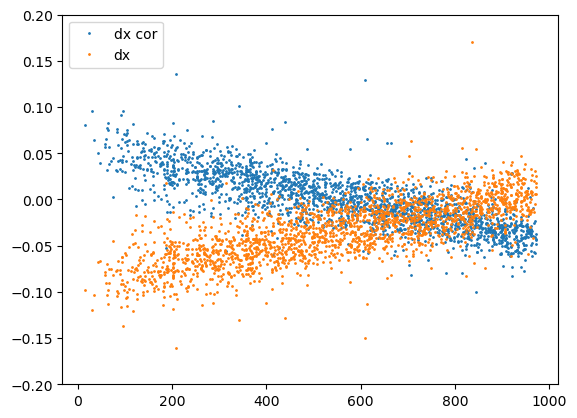

In [40]:

# plt.plot(df['y_fitted'], dy, 'o', markersize=1)
plt.plot(df['x_fitted'], dx, 'o', markersize=1,label='dx cor')


# plt.plot(df['y_fitted'], df['dy'], 'o', markersize=1)
plt.plot(df['x_fitted'], df['dx'], 'o', markersize=1,label='dx')

plt.ylim(-0.2,0.2)
plt.legend()

## 1d linear regression

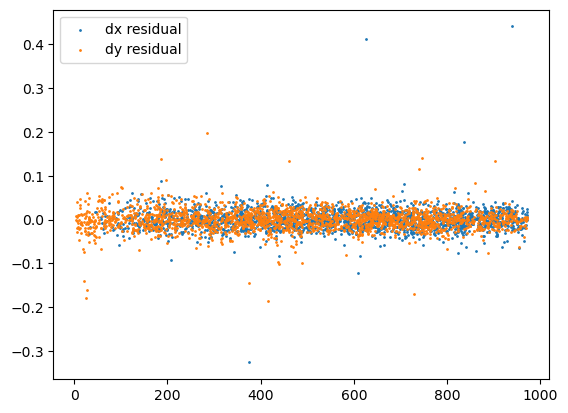

In [46]:
fit = np.polyfit(df['x_fitted'],df['dx'],1)
fit2 = np.polyfit(df['y_fitted'],df['dy'],1)
fit3 = np.polyfit(df['z_fitted'],df['dz'],1)

# plt.plot(df['x_fitted'],np.polyval(fit,df['x_fitted']),label='dx fit')
# plt.plot(df['x_fitted'], df['dx'], 'o', markersize=1,label='dx')
d_x = df['dx'] - np.polyval(fit,df['x_fitted'])
d_y = df['dy'] - np.polyval(fit2,df['y_fitted'])
d_z = df['dz'] - np.polyval(fit3,df['z_fitted'])
plt.scatter(df['x_fitted'],d_x, s=1,label='dx residual')
plt.scatter(df['y_fitted'],d_y, s=1,label='dy residual')
plt.legend()


In [45]:
np.mean(np.sqrt(d_x**2))

0.016481241760693262

In [47]:
np.mean(np.sqrt(d_x**2 + d_y**2+d_z**2))


0.04215096338130181

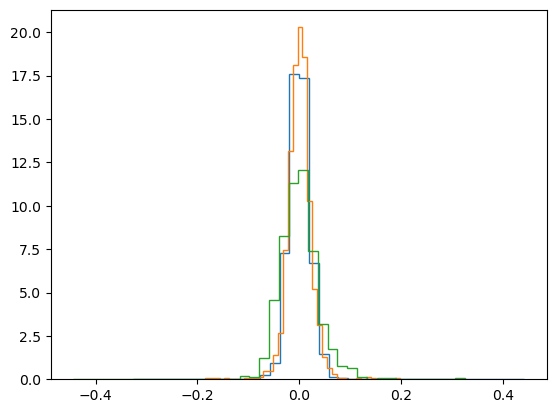

In [49]:
plt.hist(d_x, bins=b,histtype='step',label='dx',density=True)
plt.hist(d_y, bins=b,histtype='step',label='dy',density=True)
plt.hist(d_z, bins=b,histtype='step',label='dz',density=True)
plt.show()

In [35]:
d_cor = np.mean(np.sqrt(dx**2 + dy**2+dz**2))
d_cor

0.0515369294114643

In [36]:
print(d,d_cor)

0.07263257951732009 0.0515369294114643


# Check for pixel bias

In [91]:
df

,x,y,z,x_fitted,y_fitted,z_fitted,frame,method,channel,x_um,y_um,z_um,dx,dy,dz,file,image,x_pixel_pos,y_pixel_pos,z_pixel_pos
0,410.0,848.0,14.0,409.830388,848.218764,13.949596,0,com,0,53.277950,110.268439,2.789919,-0.289245,0.176010,0.348343,../runs/20240517_beads_matrigel_com/detections...,Sequence,8,2,9
1,853.0,419.0,11.0,853.062040,419.033242,11.109981,0,com,0,110.898065,54.474321,2.221996,0.012296,-0.133263,0.001272,../runs/20240517_beads_matrigel_com/detections...,Sequence,0,0,1
2,330.0,354.0,7.0,329.956985,354.056407,7.011098,0,com,0,42.894408,46.027333,1.402220,-0.136239,0.011425,0.004870,../runs/20240517_beads_matrigel_com/detections...,Sequence,9,0,0
3,104.0,274.0,9.0,103.985151,274.029126,9.032750,0,com,0,13.518070,35.623786,1.806550,-0.132901,0.001427,0.000399,../runs/20240517_beads_matrigel_com/detections...,Sequence,9,0,0
4,402.0,539.0,14.0,402.042617,538.970829,14.177478,0,com,0,52.265540,70.066208,2.835496,-0.008158,-0.012842,-0.168834,../runs/20240517_beads_matrigel_com/detections...,Sequence,0,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,872.0,288.0,15.0,871.975745,287.921071,15.198146,0,com,0,113.356847,37.429739,3.039629,-0.006236,0.003081,-0.155106,../runs/20240517_beads_matrigel_com/detections...,Sequence,9,9,1
122,847.0,32.0,10.0,847.039453,32.002105,10.031964,0,com,0,110.115129,4.160274,2.006393,-0.001656,-0.000259,-0.004041,../runs/20240517_beads_matrigel_com/detections...,Sequence,0,0,0
123,431.0,92.0,11.0,430.891350,91.551352,11.164135,0,com,0,56.015875,11.901676,2.232827,-0.000788,-0.004090,-0.000416,../runs/20240517_beads_matrigel_com/detections...,Sequence,8,5,1
124,492.0,28.0,11.0,492.044069,28.029545,11.094058,0,com,0,63.965729,3.643841,2.218812,-0.132634,0.016205,-0.004783,../runs/20240517_beads_matrigel_com/detections...,Sequence,0,0,0


In [11]:
df['x_pixel_pos'] = np.abs(df.x - df.x_fitted) #[int((num - int(num)) * 10) for num in df['x_um'].values]
df['y_pixel_pos'] = np.abs(df.y - df.y_fitted)  #[int((num - int(num)) * 10) for num in df['y_um'].values]
df['z_pixel_pos'] = np.abs(df.z - df.z_fitted)  #[int((num - int(num)) * 10) for num in df['z_um'].values]

In [12]:
df['x_pixel_pos_bins'] = pd.cut(df['x_pixel_pos'], bins=10)
df['y_pixel_pos_bins'] = pd.cut(df['y_pixel_pos'], bins=10)
df['z_pixel_pos_bins'] = pd.cut(df['z_pixel_pos'], bins=10)

In [13]:
df

,x,y,z,x_fitted,y_fitted,z_fitted,frame,method,channel,x_um,...,dy,dz,file,image,x_pixel_pos,y_pixel_pos,z_pixel_pos,x_pixel_pos_bins,y_pixel_pos_bins,z_pixel_pos_bins
0,410.0,848.0,14.0,409.830388,848.218764,13.949596,0,com,0,53.277950,...,0.176010,0.348343,../runs/20240517_beads_matrigel_com/detections...,Sequence,0.169612,0.218764,0.050404,"(0.116, 0.175]","(0.187, 0.25]","(0.0446, 0.0891]"
1,853.0,419.0,11.0,853.062040,419.033242,11.109981,0,com,0,110.898065,...,-0.133263,0.001272,../runs/20240517_beads_matrigel_com/detections...,Sequence,0.062040,0.033242,0.109981,"(0.0582, 0.116]","(-0.000526, 0.0626]","(0.0891, 0.134]"
2,330.0,354.0,7.0,329.956985,354.056407,7.011098,0,com,0,42.894408,...,0.011425,0.004870,../runs/20240517_beads_matrigel_com/detections...,Sequence,0.043015,0.056407,0.011098,"(-0.000572, 0.0582]","(-0.000526, 0.0626]","(-0.00028, 0.0446]"
3,104.0,274.0,9.0,103.985151,274.029126,9.032750,0,com,0,13.518070,...,0.001427,0.000399,../runs/20240517_beads_matrigel_com/detections...,Sequence,0.014849,0.029126,0.032750,"(-0.000572, 0.0582]","(-0.000526, 0.0626]","(-0.00028, 0.0446]"
4,402.0,539.0,14.0,402.042617,538.970829,14.177478,0,com,0,52.265540,...,-0.012842,-0.168834,../runs/20240517_beads_matrigel_com/detections...,Sequence,0.042617,0.029171,0.177478,"(-0.000572, 0.0582]","(-0.000526, 0.0626]","(0.134, 0.178]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,872.0,288.0,15.0,871.975745,287.921071,15.198146,0,com,0,113.356847,...,0.003081,-0.155106,../runs/20240517_beads_matrigel_com/detections...,Sequence,0.024255,0.078929,0.198146,"(-0.000572, 0.0582]","(0.0626, 0.125]","(0.178, 0.222]"
122,847.0,32.0,10.0,847.039453,32.002105,10.031964,0,com,0,110.115129,...,-0.000259,-0.004041,../runs/20240517_beads_matrigel_com/detections...,Sequence,0.039453,0.002105,0.031964,"(-0.000572, 0.0582]","(-0.000526, 0.0626]","(-0.00028, 0.0446]"
123,431.0,92.0,11.0,430.891350,91.551352,11.164135,0,com,0,56.015875,...,-0.004090,-0.000416,../runs/20240517_beads_matrigel_com/detections...,Sequence,0.108650,0.448648,0.164135,"(0.0582, 0.116]","(0.437, 0.5]","(0.134, 0.178]"
124,492.0,28.0,11.0,492.044069,28.029545,11.094058,0,com,0,63.965729,...,0.016205,-0.004783,../runs/20240517_beads_matrigel_com/detections...,Sequence,0.044069,0.029545,0.094058,"(-0.000572, 0.0582]","(-0.000526, 0.0626]","(0.0891, 0.134]"


In [14]:
d = 'dy'
df_heat = df[['x_pixel_pos_bins','y_pixel_pos_bins','z_pixel_pos',d]].groupby(['x_pixel_pos_bins','y_pixel_pos_bins']).mean().reset_index().pivot(index='y_pixel_pos_bins', columns='x_pixel_pos_bins', values=d)

In [15]:
df_heat.fillna(0,inplace=True)

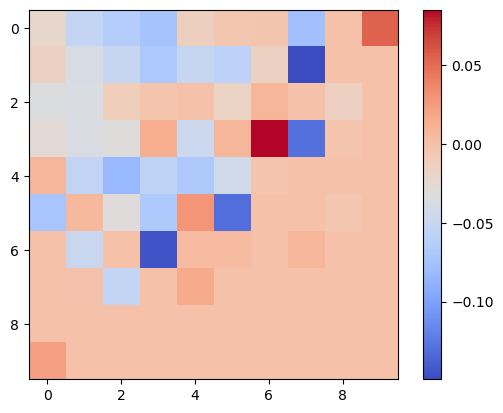

In [16]:
plt.imshow(df_heat,cmap='coolwarm')
plt.colorbar()

In [17]:
df_heat

x_pixel_pos_bins,"(-0.000572, 0.0582]","(0.0582, 0.116]","(0.116, 0.175]","(0.175, 0.233]","(0.233, 0.291]","(0.291, 0.349]","(0.349, 0.408]","(0.408, 0.466]","(0.466, 0.524]","(0.524, 0.582]"
y_pixel_pos_bins,,,,,,,,,,
"(-0.000526, 0.0626]",-0.021573,-0.052923,-0.063895,-0.073353,-0.014103,-0.005075,-0.004319,-0.076125,0.000000,0.054499
"(0.0626, 0.125]",-0.015613,-0.037664,-0.051194,-0.069481,-0.050654,-0.056797,-0.016185,-0.149345,0.000000,0.000000
"(0.125, 0.187]",-0.033185,-0.035275,-0.012535,-0.002827,-0.000136,-0.017425,0.008208,0.000000,-0.014609,0.000000
"(0.187, 0.25]",-0.027093,-0.036410,-0.031299,0.013556,-0.045749,0.008319,0.085438,-0.129649,-0.003446,0.000000
"(0.25, 0.312]",0.007560,-0.053286,-0.083231,-0.056472,-0.067878,-0.041332,-0.003052,0.000000,0.000000,0.000000
"(0.312, 0.375]",-0.071819,0.006261,-0.030505,-0.067978,0.029141,-0.130858,0.000000,0.000000,-0.005243,0.000000
"(0.375, 0.437]",0.000000,-0.048106,0.000000,-0.144046,0.004340,0.003859,0.000000,0.008267,0.000000,0.000000
"(0.437, 0.5]",0.000000,-0.001629,-0.052779,0.000000,0.014951,0.000000,0.000000,0.000000,0.000000,0.000000
"(0.5, 0.562]",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


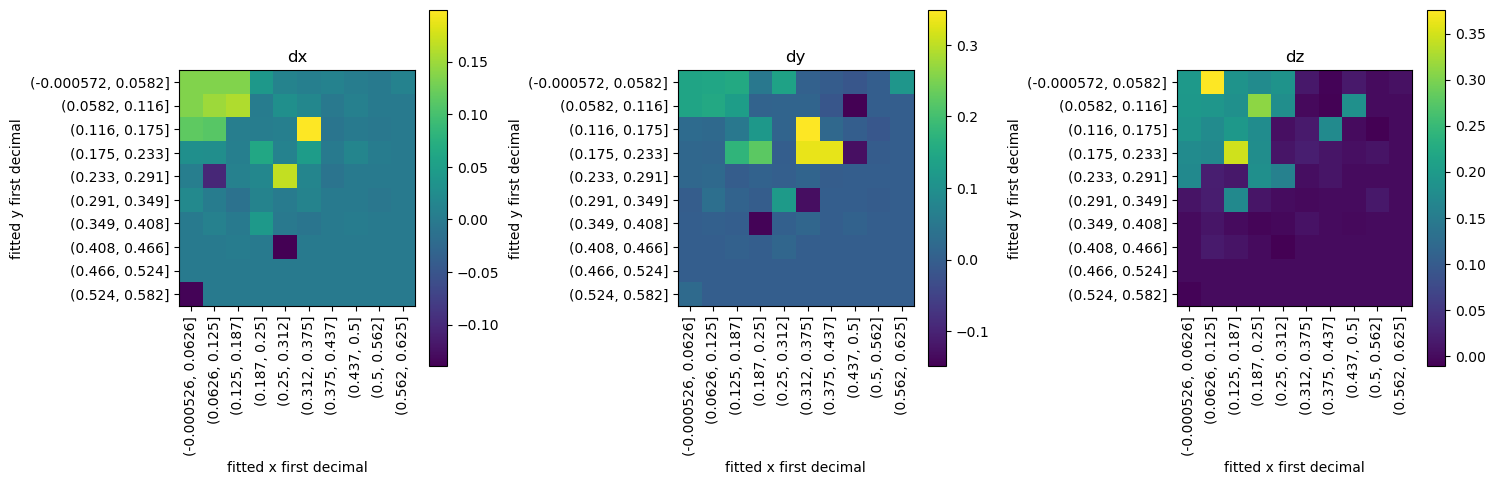

In [19]:
fig,ax = plt.subplots(1,3,figsize=(15,5))

for l,d in enumerate(['dx','dy','dz']):
    df_heat = df[['x_pixel_pos_bins','y_pixel_pos_bins','z_pixel_pos',d]].groupby(['x_pixel_pos_bins','y_pixel_pos_bins']).max().reset_index().pivot(index='y_pixel_pos_bins', columns='x_pixel_pos_bins', values=d)

    df_heat.fillna(0,inplace=True)

    im = ax[l].imshow(df_heat,cmap='viridis')
    ax[l].set_title(d)
    fig.colorbar(im, ax=ax[l])
    ax[l].set_xticks(range(10),df_heat.index.values,rotation=90)
    ax[l].set_yticks(range(10),df_heat.columns.values)

for a in ax:
    a.set_xlabel('fitted x first decimal')
    a.set_ylabel('fitted y first decimal')


plt.tight_layout()


# Un-smoothed image

In [50]:
df_comb = []
for path in glob('../runs/20240517_beads_matrigel_com_unsmoothed/*_matched_*.csv'):
    df_temp = pd.read_csv(path)
    df_temp['file'] = path
    df_temp['image'] = path.split('_')[9]
    df_comb.append(df_temp)

df_un = pd.concat(df_comb)

In [51]:
df_un

,x,y,z,x_fitted,y_fitted,z_fitted,frame,method,channel,x_um,y_um,z_um,dx,dy,dz,file,image
0,410.0,848.0,14.0,410.218764,847.830388,13.949596,0,com,0,53.328439,110.217950,2.789919,-0.213990,0.100755,0.348343,../runs/20240517_beads_matrigel_com_unsmoothed...,Illumination
1,853.0,419.0,11.0,853.033242,419.062040,11.109981,0,com,0,110.894321,54.478065,2.221996,-0.003263,-0.117704,0.001272,../runs/20240517_beads_matrigel_com_unsmoothed...,Illumination
2,330.0,354.0,7.0,330.056407,353.956985,7.011098,0,com,0,42.907333,46.014408,1.402220,-0.118575,-0.006239,0.004870,../runs/20240517_beads_matrigel_com_unsmoothed...,Illumination
3,104.0,274.0,9.0,104.029126,273.985151,9.032750,0,com,0,13.523786,35.618070,1.806550,-0.128573,-0.002901,0.000399,../runs/20240517_beads_matrigel_com_unsmoothed...,Illumination
4,402.0,539.0,14.0,401.970829,539.042617,14.177478,0,com,0,52.256208,70.075540,2.835496,-0.012842,-0.008158,-0.168834,../runs/20240517_beads_matrigel_com_unsmoothed...,Illumination
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,872.0,288.0,15.0,871.921071,287.975745,15.198146,0,com,0,113.349739,37.436847,3.039629,0.003081,-0.006236,-0.155106,../runs/20240517_beads_matrigel_com_unsmoothed...,Illumination
122,847.0,32.0,10.0,847.002105,32.039453,10.031964,0,com,0,110.110274,4.165129,2.006393,-0.000259,-0.001656,-0.004041,../runs/20240517_beads_matrigel_com_unsmoothed...,Illumination
123,431.0,92.0,11.0,430.551352,91.891350,11.164135,0,com,0,55.971676,11.945875,2.232827,-0.004090,-0.000788,-0.000416,../runs/20240517_beads_matrigel_com_unsmoothed...,Illumination
124,492.0,28.0,11.0,492.029545,28.044069,11.094058,0,com,0,63.963841,3.645729,2.218812,-0.113795,-0.002634,-0.004783,../runs/20240517_beads_matrigel_com_unsmoothed...,Illumination


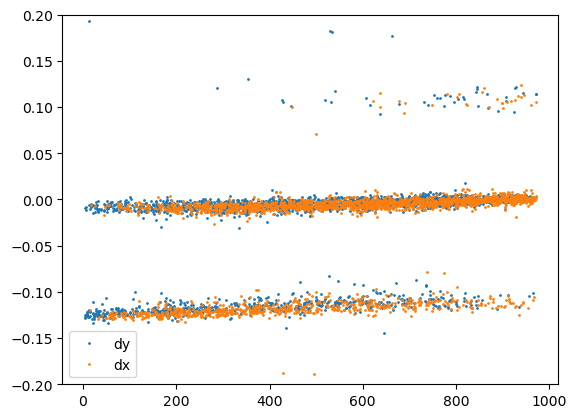

In [52]:

plt.plot(df_un['y_fitted'], df_un['dy'], 'o', markersize=1,label='dy')
plt.plot(df_un['x_fitted'], df_un['dx'], 'o', markersize=1,label='dx')
plt.ylim(-0.2,0.2)
plt.legend()

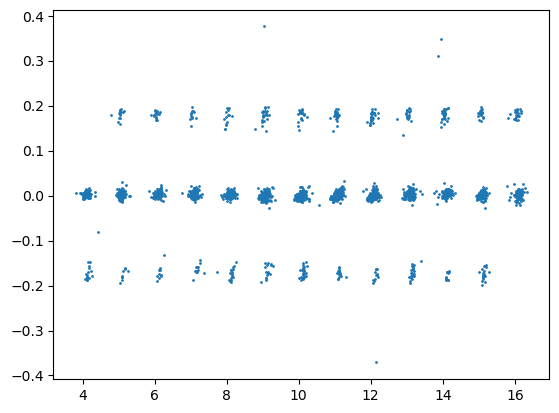

In [53]:
plt.plot(df_un['z_fitted'], df_un['dz'], 'o', markersize=1,label='dz')


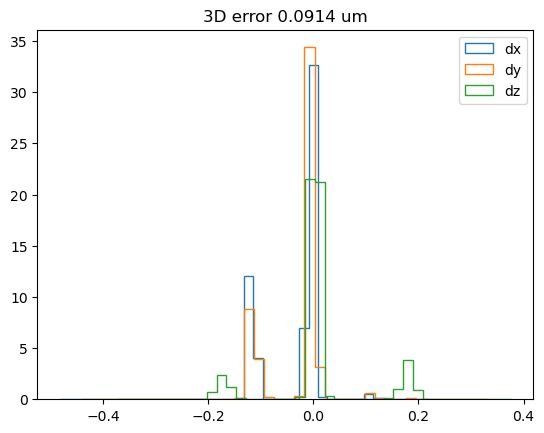

In [57]:
plt.hist(df_un['dx'], bins=b,histtype='step',label='dx',density=True)
plt.hist(df_un['dy'], bins=b,histtype='step',label='dy',density=True)
plt.hist(df_un['dz'], bins=b,histtype='step',label='dz',density=True)
plt.title(f'3D error {np.mean(np.sqrt(df_un["dx"]**2 + df_un["dy"]**2+df_un["dz"]**2)):.4f} um')
plt.legend()

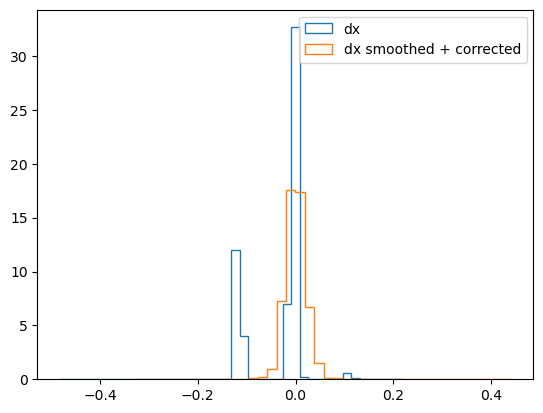

In [61]:
plt.hist(df_un['dx'], bins=b,histtype='step',label='dx',density=True)
plt.hist(d_x, bins=b,histtype='step',label='dx smoothed + corrected',density=True)
plt.legend()
plt.show()

# 3D regression

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
df

,x,y,z,x_fitted,y_fitted,z_fitted,frame,method,z_fitted_refined,x_fitted_refined,...,x_um,y_um,z_um,dx,dy,dz,file,image,smoothing,crop_size
0,920.0,402.0,7.0,920.530257,401.896374,6.972885,0,com,6.993889,920.710699,...,119.692391,52.245648,2.098167,0.118867,-0.024860,0.016346,runs/20240529_beads/detections_matched/detecti...,005,1,13
1,433.0,786.0,6.0,433.193603,785.965224,6.115891,0,com,6.099110,433.265467,...,56.324511,102.161150,1.829733,0.022821,0.046901,-0.000974,runs/20240529_beads/detections_matched/detecti...,005,1,13
2,761.0,635.0,6.0,761.414635,635.005636,6.275985,0,com,6.240505,761.325405,...,98.972303,82.537723,1.872151,0.064064,0.012569,-0.022476,runs/20240529_beads/detections_matched/detecti...,005,1,13
3,951.0,564.0,7.0,951.646116,563.732670,6.563458,0,com,6.607234,951.721447,...,123.723788,73.282944,1.982170,0.123341,-0.021049,0.027832,runs/20240529_beads/detections_matched/detecti...,005,1,13
4,315.0,391.0,7.0,315.190601,391.020801,6.860349,0,com,6.886320,315.247964,...,40.982235,50.837436,2.065896,0.002955,0.002527,-0.015437,runs/20240529_beads/detections_matched/detecti...,005,1,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,792.0,609.0,7.0,792.345954,609.103098,6.945431,0,com,6.933964,792.360105,...,103.006814,79.184013,2.080189,-0.002055,-0.004795,0.013666,runs/20240529_beads/detections_matched/detecti...,010,0,11
22,441.0,543.0,7.0,441.192103,542.989391,7.011838,0,com,6.992357,441.179603,...,57.353348,70.588518,2.097707,-0.000667,0.004769,0.004048,runs/20240529_beads/detections_matched/detecti...,010,0,11
23,782.0,821.0,6.0,782.000172,820.953595,6.028796,0,com,6.040871,781.992769,...,101.659060,106.720383,1.812261,0.012078,0.003189,0.004976,runs/20240529_beads/detections_matched/detecti...,010,0,11
24,831.0,323.0,7.0,831.021133,323.021056,7.040343,0,com,7.053674,831.044543,...,108.035791,41.993264,2.116102,0.002742,-0.002915,0.004068,runs/20240529_beads/detections_matched/detecti...,010,0,11


In [20]:
# Create a LinearRegression model
model = LinearRegression()

# Fit the model to the data
model.fit(df[['x_fitted_refined','y_fitted_refined','z_fitted_refined']], df[['dx','dy','dz']])

LinearRegression()

In [21]:
# Print the coefficients
print('Coefficients:', model.coef_)

# Print the intercept
print('Intercept:', model.intercept_)

Coefficients: [[ 6.35574844e-05  4.66365197e-05  4.06983523e-03]
 [-3.54362696e-05  4.62455556e-05  1.99766516e-03]
 [ 1.15604895e-05  3.55749474e-06  4.97842154e-03]]
Intercept: [-0.07097015 -0.01973512 -0.01207441]


In [22]:
import pickle

In [23]:
with open('/tungstenfs/scratch/ggiorget/nessim/2_color_imaging/localization_precision_estimation/models/beads_matrigel_3d_linear_regression.pkl','wb') as f:
    pickle.dump(model,f)

In [70]:
d_x2 = df['dx'] - model.predict(df[['x_fitted','y_fitted','z_fitted']])[:,0]
d_y2 = df['dy'] - model.predict(df[['x_fitted','y_fitted','z_fitted']])[:,1]
d_z2 = df['dz'] - model.predict(df[['x_fitted','y_fitted','z_fitted']])[:,2]

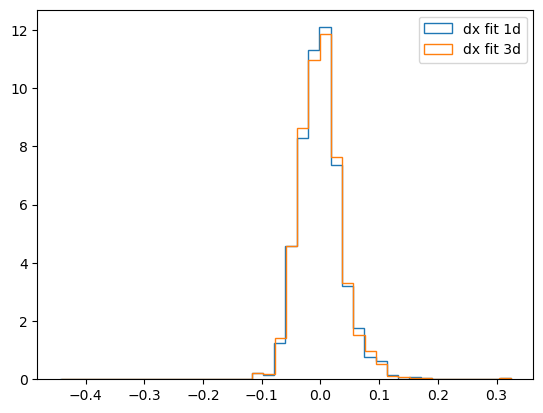

In [75]:
plt.hist(d_x, bins=b,histtype='step',label='dx fit 1d',density=True)
plt.hist(d_x2, bins=b,histtype='step',label='dx fit 3d',density=True)
# plt.hist(d_y, bins=b,histtype='step',label='dy',density=True)
# plt.hist(d_z, bins=b,histtype='step',label='dz',density=True)
plt.legend()
plt.show()

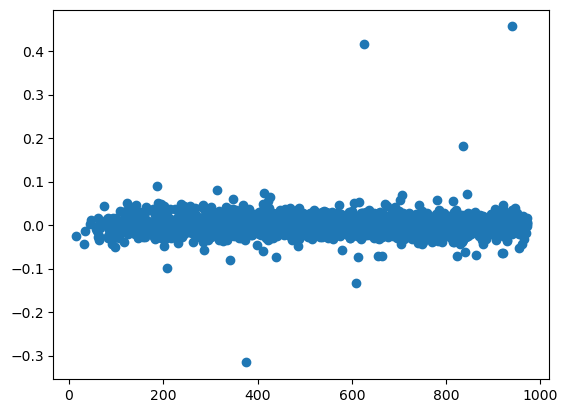

In [82]:
plt.scatter(df['x_fitted'],d_x2)

In [76]:
np.mean(np.sqrt(d_x2**2 + d_y2**2+d_z2**2))

0.03962124479813429

In [81]:
np.mean(np.sqrt(d_z**2))

0.028473160099828972

In [4]:
df_comb = []
for path in glob('../runs/20240524_cells_0_20240506_com/*_matched_*.csv'):
    df_temp = pd.read_csv(path)
    df_temp['file'] = path
    df_temp['image'] = path.split('_')[9]
    df_comb.append(df_temp)

df = pd.concat(df_comb)

In [5]:
df

,x,y,z,x_fitted,y_fitted,z_fitted,frame,method,channel,x_um,y_um,z_um,dx,dy,dz,file,image
0,531.0,334.0,9.0,531.456070,333.722908,8.496696,0,com,0,69.089289,43.383978,2.549009,-0.062962,0.080075,-0.031875,../runs/20240524_cells_0_20240506_com/detectio...,7%laser
1,956.0,51.0,5.0,955.969150,50.910046,5.925564,0,com,0,124.275989,6.618306,1.777669,0.012008,0.041374,0.310816,../runs/20240524_cells_0_20240506_com/detectio...,7%laser
2,691.0,409.0,5.0,690.934690,408.846437,5.175668,0,com,0,89.821510,53.150037,1.552700,-0.018157,0.040443,0.108656,../runs/20240524_cells_0_20240506_com/detectio...,7%laser
3,685.0,212.0,7.0,685.153570,212.041106,7.790437,0,com,0,89.069964,27.565344,2.337131,0.004814,0.073948,0.390906,../runs/20240524_cells_0_20240506_com/detectio...,7%laser
4,530.0,634.0,6.0,529.912781,633.894700,6.231785,0,com,0,68.888662,82.406311,1.869536,-0.011687,0.039043,-0.106277,../runs/20240524_cells_0_20240506_com/detectio...,7%laser
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,696.0,521.0,5.0,695.606737,521.571830,5.052037,0,com,0,90.428876,67.804338,1.515611,-0.014692,-0.018689,0.105993,../runs/20240524_cells_0_20240506_com/detectio...,7%laser
6,646.0,653.0,6.0,645.951917,652.428142,5.690555,0,com,0,83.973749,84.815658,1.707166,-0.007517,0.072566,-0.125507,../runs/20240524_cells_0_20240506_com/detectio...,7%laser
7,514.0,515.0,4.0,513.699305,514.902904,3.824307,0,com,0,66.780910,66.937378,1.147292,0.062851,0.027757,-0.170606,../runs/20240524_cells_0_20240506_com/detectio...,7%laser
8,763.0,817.0,7.0,762.698260,816.965952,6.867661,0,com,0,99.150774,106.205574,2.060298,-0.064752,-0.013474,0.110737,../runs/20240524_cells_0_20240506_com/detectio...,7%laser


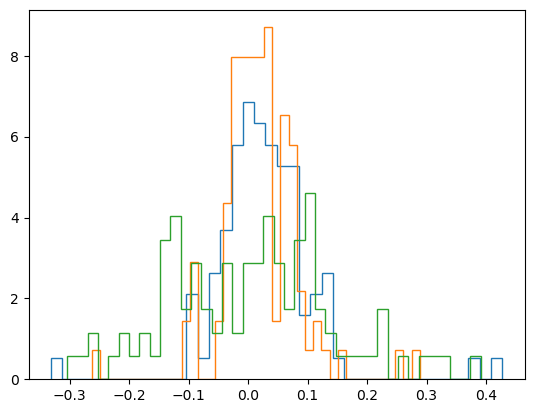

In [10]:
b = 40
plt.hist(df['dx'], bins=b,histtype='step',label='dx',density=True)
plt.hist(df['dy'], bins=b,histtype='step',label='dy',density=True)
plt.hist(df['dz'], bins=b,histtype='step',label='dz',density=True)
plt.show()

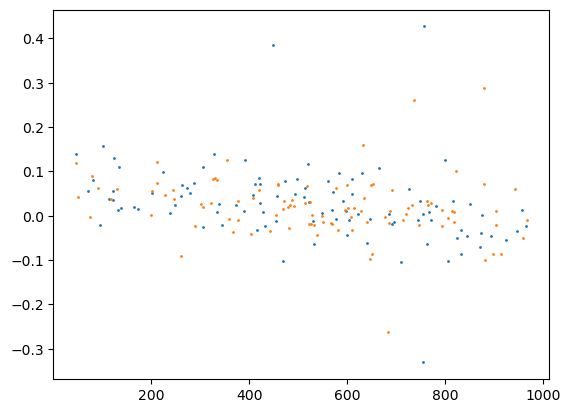

In [12]:
plt.scatter(df['x_fitted'],df['dx'],s=1)
plt.scatter(df['y_fitted'],df['dy'],s=1)

In [14]:
np.mean(np.sqrt(df['dx']**2 + df['dy']**2+df['dz']**2))

0.1559406325806732

In [15]:
np.mean(np.sqrt(df['dx']**2 ))

0.05959375328048505

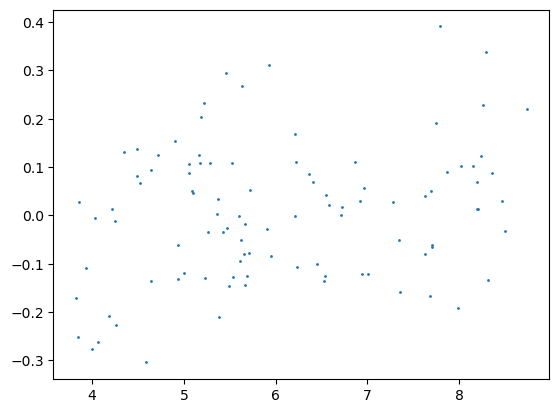

In [13]:
plt.scatter(df['z_fitted'],df['dz'],s=1)